# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = pd.read_csv('C:\\Users\\Tayo Adeyo\\Downloads\\Module3_week2\\used_device_data.csv')

In [3]:
# creating a copy of the data so as not to make changes to the original data.
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# Displaying the first few rows of the dataset
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
# Checking the shape of the dataset
df.shape

(3454, 15)

In [6]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
# Checking for duplicate entries
df.duplicated().value_counts()

False    3454
dtype: int64

In [8]:
# Checking for missing entries in the dataset
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [9]:
# Statistical summary of the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [10]:
# Statistical summary of the categorical columns of the dataset

df.describe(include='object').T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


##### Observation
1. There are 34 unique device brands in the dataset
2. Android devices makes up a large portion of the available devices (3214 out of 3454)
3. many of the devices are 4G enabled (2335 out of 3454)
4. Many of the available devices are not 5G enabled (3302 out of 3454)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,8))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Question 1: What does the distribution of normalized used device prices look like?

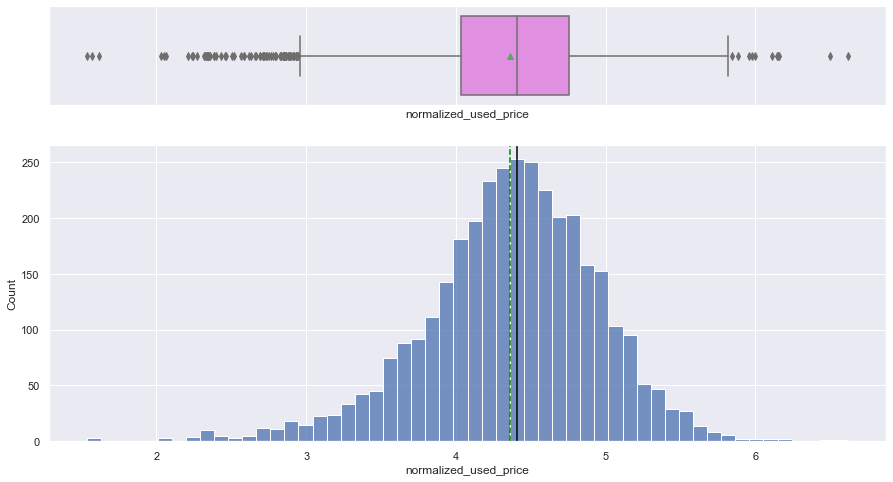

In [13]:
histogram_boxplot(df, "normalized_used_price")

#### Answer
The distribution of the normalized used price is almost normal (albeit slightly skewed to the left) with many outliers and the median point lying at around 4.4

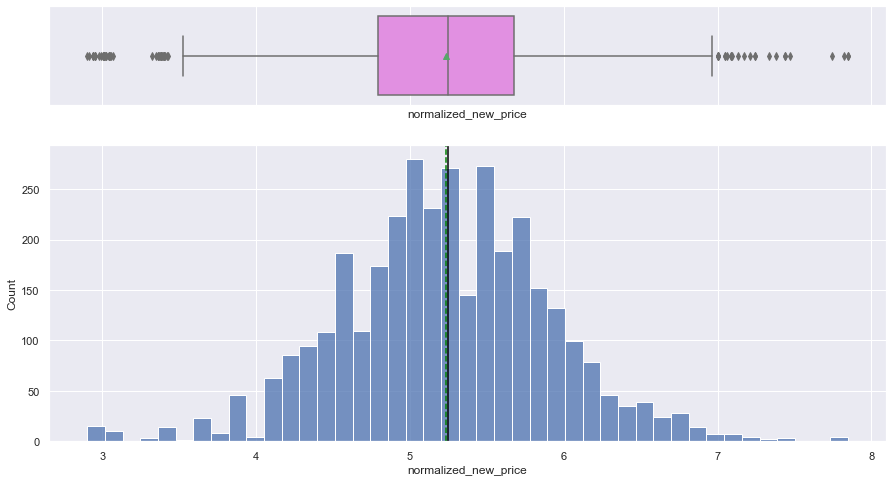

In [14]:
histogram_boxplot(df, "normalized_new_price")

##### Observation
The distribution of the normalised new price of devices is almost normal with the mean and median lying at around 5.2

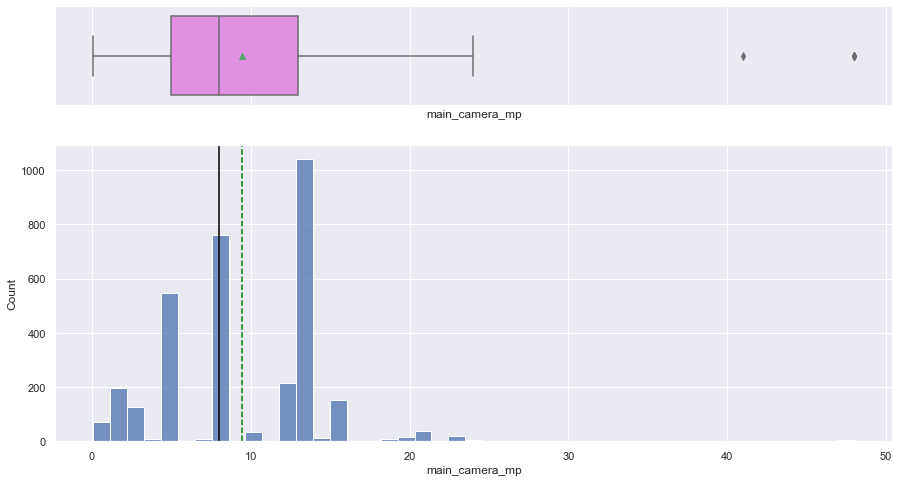

In [15]:
histogram_boxplot(df, "main_camera_mp")

The distribution of main_camera_mp is right skewed with a few outliers and the median lying around 8 megapixels

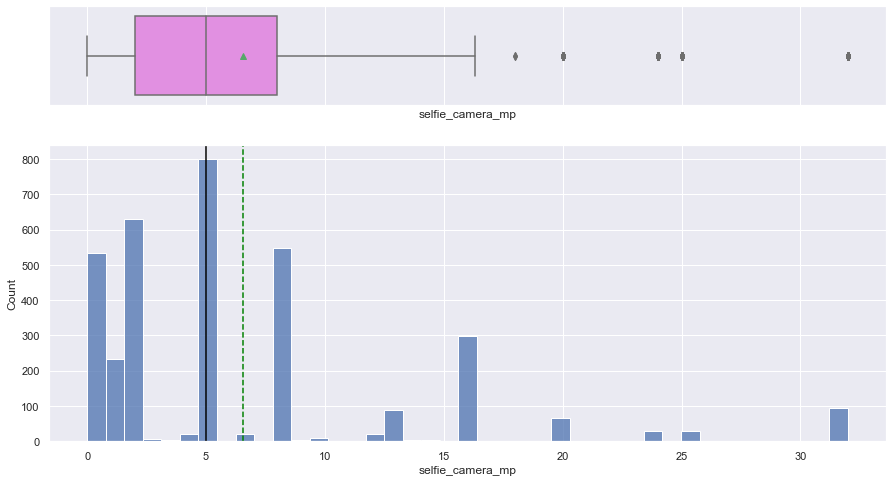

In [16]:
histogram_boxplot(df, "selfie_camera_mp")

The distribution of selfie_camera_mp is right skewed with a few outliers and the median lying around 5 megapixels

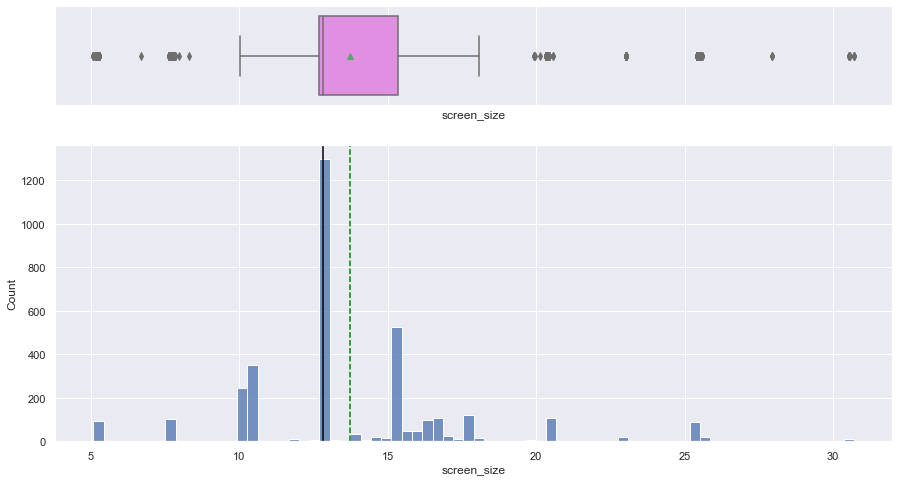

In [17]:
histogram_boxplot(df, "screen_size")

The distribution of screen_size is right skewed with a few outliers and the median lying around 12.8 cm

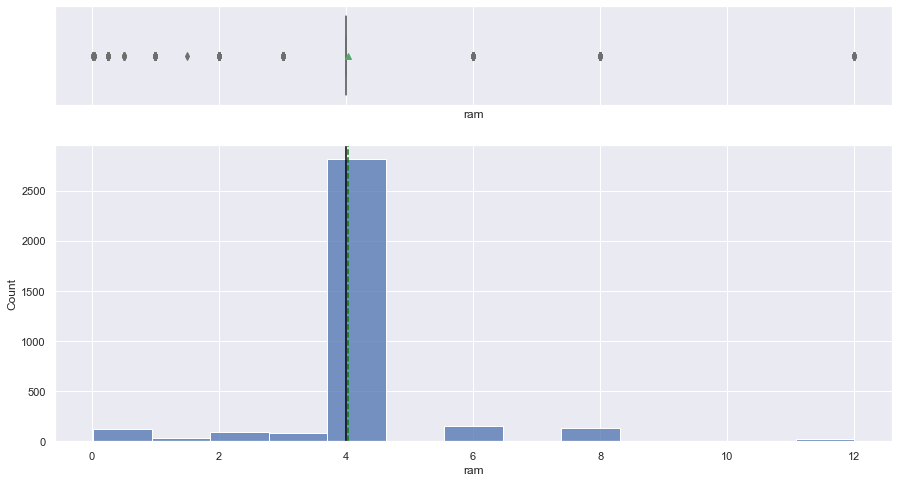

In [18]:
histogram_boxplot(df, "ram")

The distribution of ram is normal with the median and mean lying at 4GB

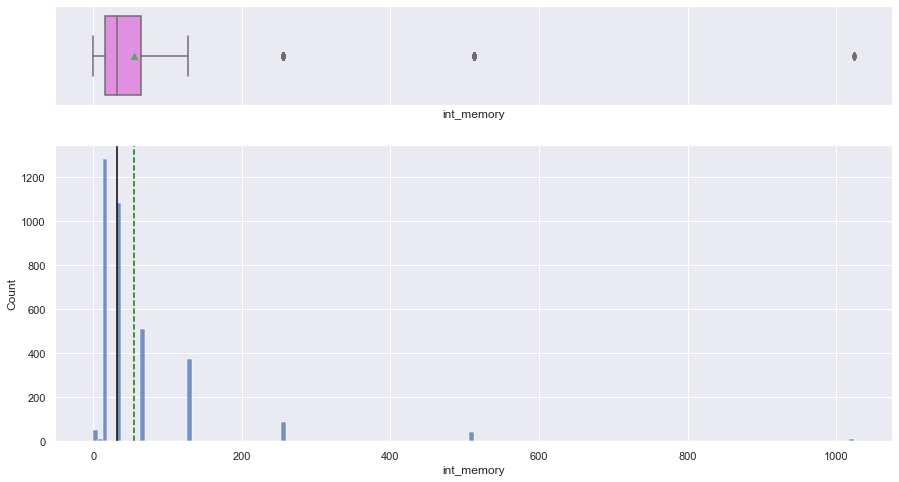

In [19]:
histogram_boxplot(df, "int_memory")

The distribution of int_memory is right skewed with a few outliers and the median lies at around 32GB

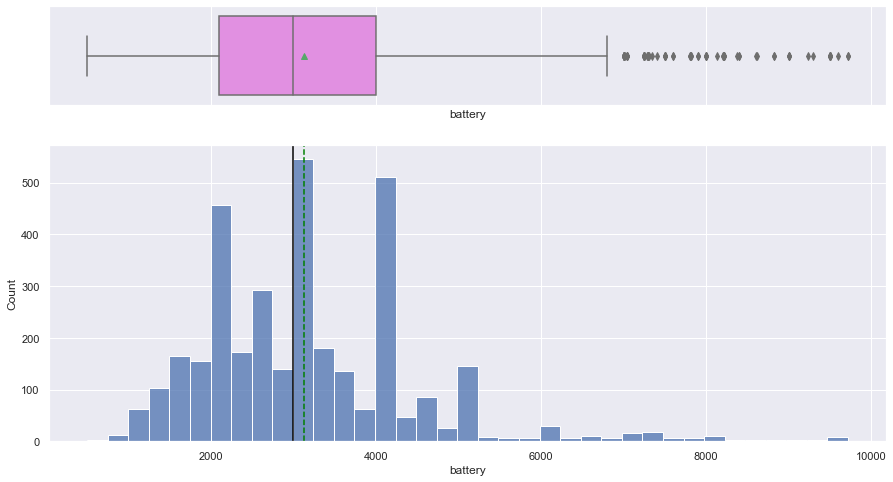

In [20]:
histogram_boxplot(df, "battery")

The distribution of battery is right skewed with many outliers and with the median lying at around 3000mAH

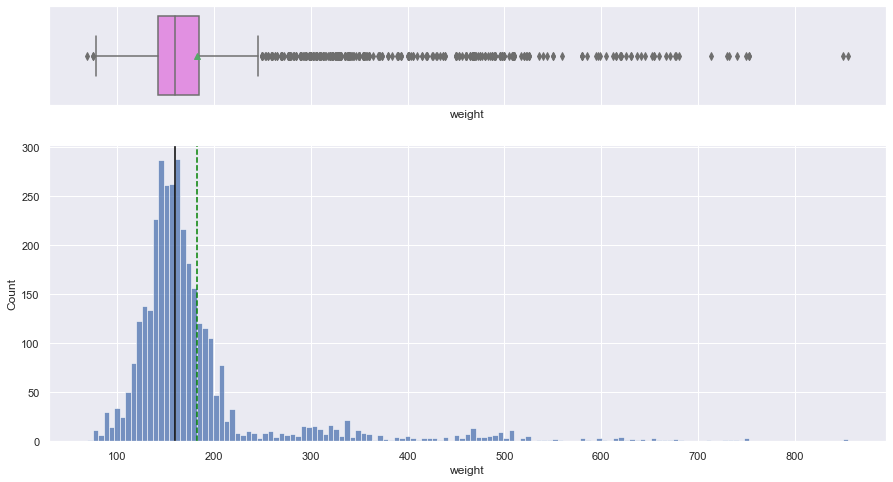

In [21]:
histogram_boxplot(df, "weight")

The distribution of the weight is right skewed with many outliers. The median lies at around 160 grams

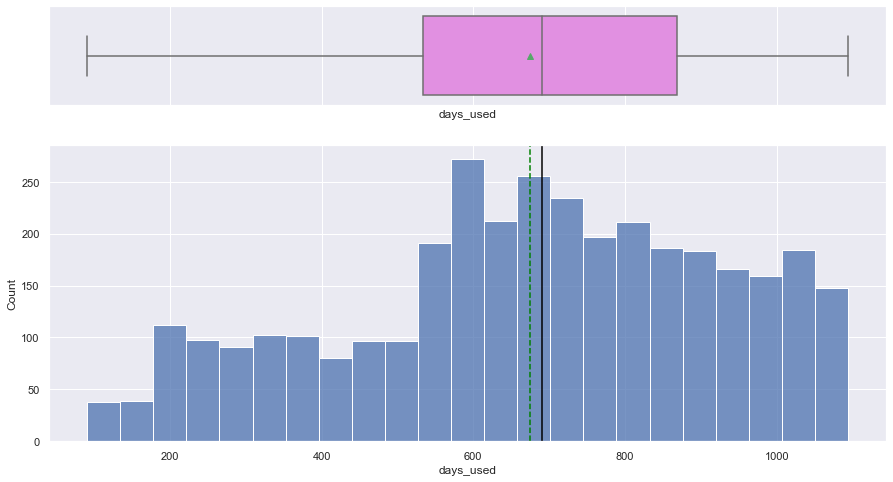

In [22]:
histogram_boxplot(df, "days_used")

The distribution of days used is left skewed with the median lying at around 700 days.

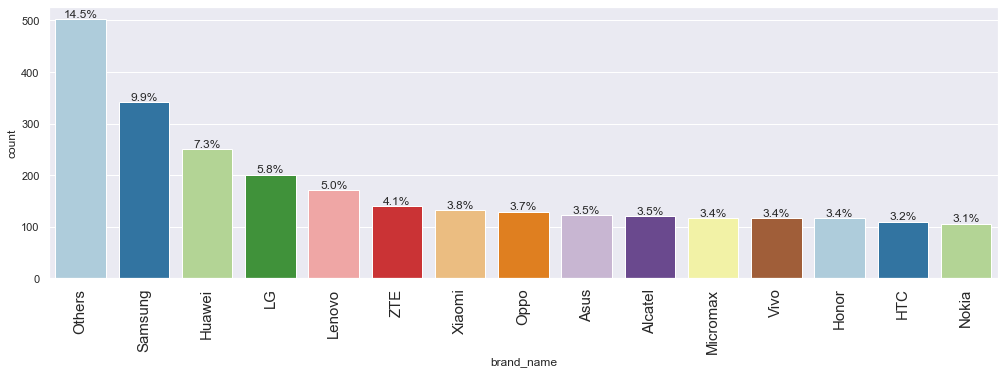

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=15)

Samsung, Huawei, LG and Lenovo has the largest share of the used devices market with a market share of 28% between them

#### Question 2: What percentage of the used device market is dominated by Android devices?

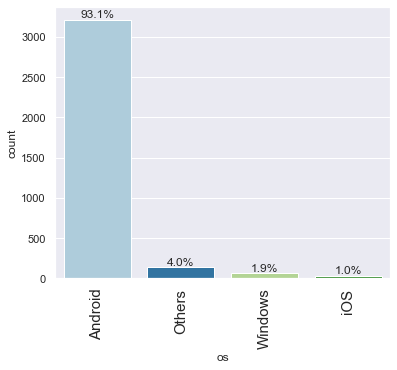

In [24]:
labeled_barplot(df, "os", perc=True)

#### Answer
Android devices takes up about 93.1% of the used devices market

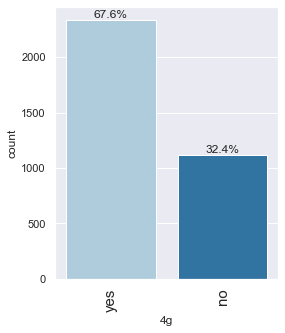

In [25]:
labeled_barplot(df, "4g", perc=True)

67.6% of the devices on the used devices market are 4G capable.

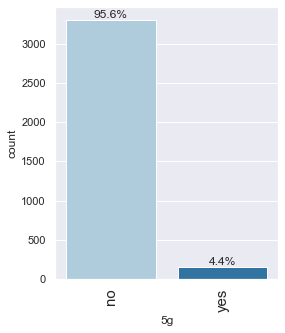

In [26]:
labeled_barplot(df, "5g", perc=True)

A paltry 4.4% of the devices on the used devices market are 5G enabled.

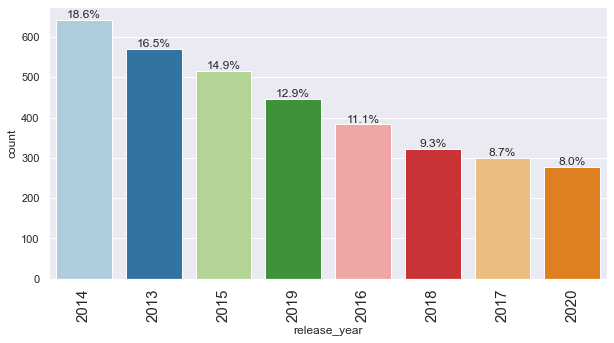

In [27]:
labeled_barplot(df, "release_year", perc=True)

#### Observation
One would expect to see more of the older devices on the used devices market, but devices released in 2019 bucks this trend as there are more of them on the market (12.9%) than devices released in the three years previous - 2016 (11.1%), 2017 (8.7%) and 2018 (9.3%)

### Bivariate Analysis

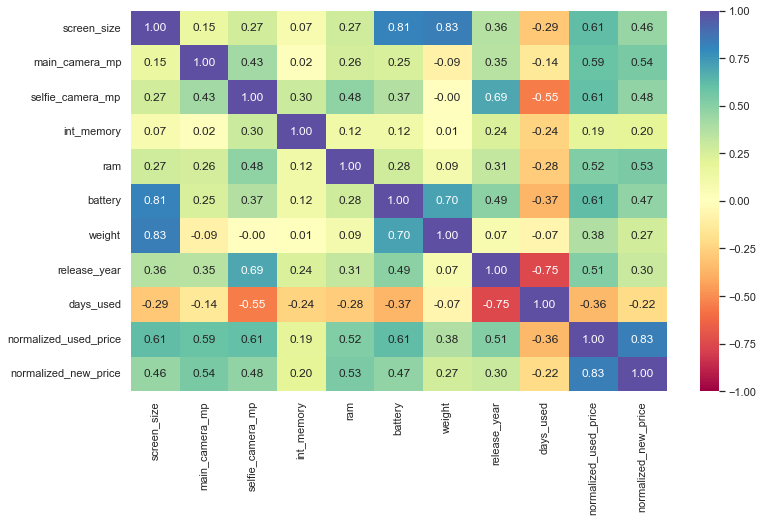

In [28]:
num_cols = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
            'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
plt.figure(figsize=(12, 7))
sns.heatmap(    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation
1. There is a strong positive correlation between a device's release year and the selfie_camera_mp, meaning that the more recent a device is, the better the selfie camera.
2. The release year is also strongly negatively correlated with the days in use. This is intuitive. The more recent the release year, the smaller the number of days in use.
3. The normalized used price has a very strong correlation with the normalized new price of devices and it is also strongly correlated with the screen_size, selfie_camera_mp, main_camera_mp, ram, battery and the release_year.
4. the weight of a device has a strong correlation to its screen_size and battery


#### Question 7: Which attributes are highly correlated with the normalized price of a used device?

#### Answer
The normalized used price has a very strong correlation with the normalized new price of devices and it is also strongly correlated with the screen_size, selfie_camera_mp, main_camera_mp, ram, battery and the release_year.

In [29]:
# Predefined "labelled_barplot" function modified to include the "hue" parameter

def labeled_barplot_mod(data, feature, hue, perc=False, n=None):
    """
    Barplot with percentage at the top, with hue parameter included

    data: dataframe
    feature: dataframe column
    hue: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="CMRmap",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


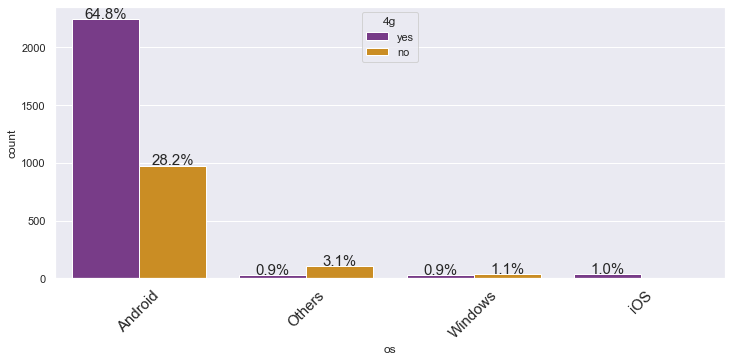

In [30]:
labeled_barplot_mod(df, "os", hue="4g", perc=True, n=10)

Android devices configured with 4G technology takes up almost 65% of the used devices market.

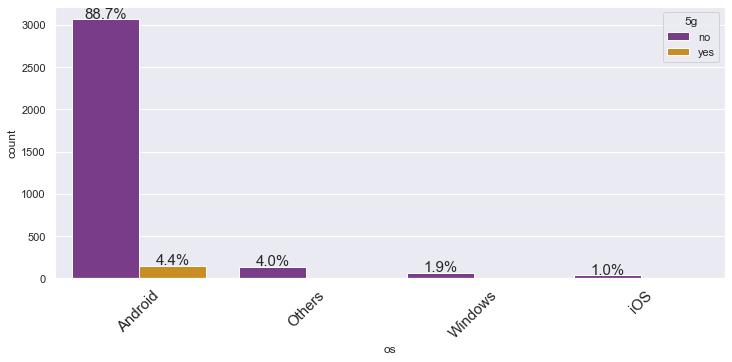

In [31]:
labeled_barplot_mod(df, "os", hue="5g", perc=True, n=10)

Of the devices in the used device market, only android devices can be found configured with 5G technology, and this makes up about 4.4% of the used devices on the market.

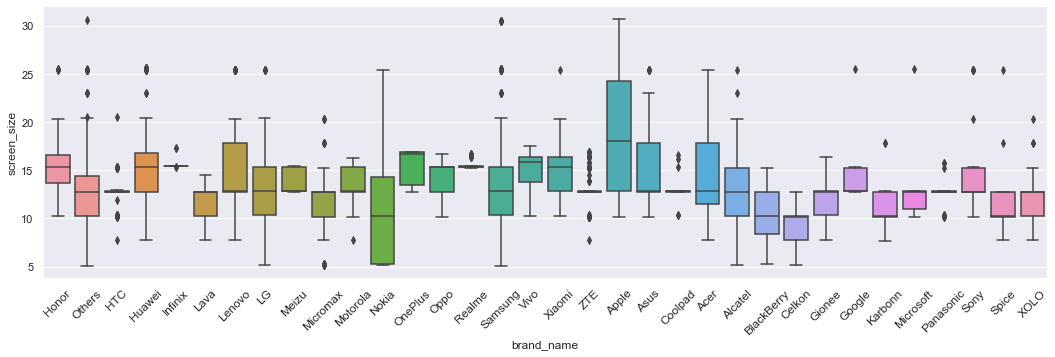

In [32]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="screen_size");

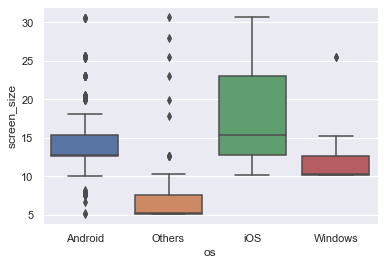

In [33]:
sns.boxplot(data=df, x="os", y="screen_size");

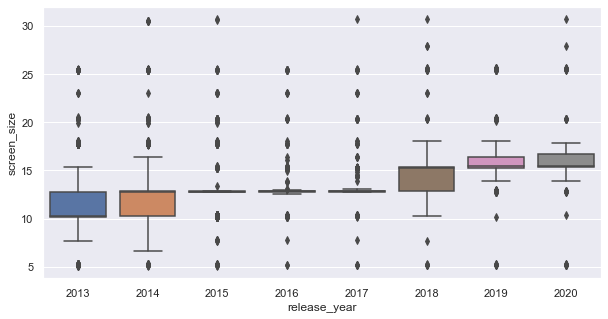

In [114]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="release_year", y="screen_size");

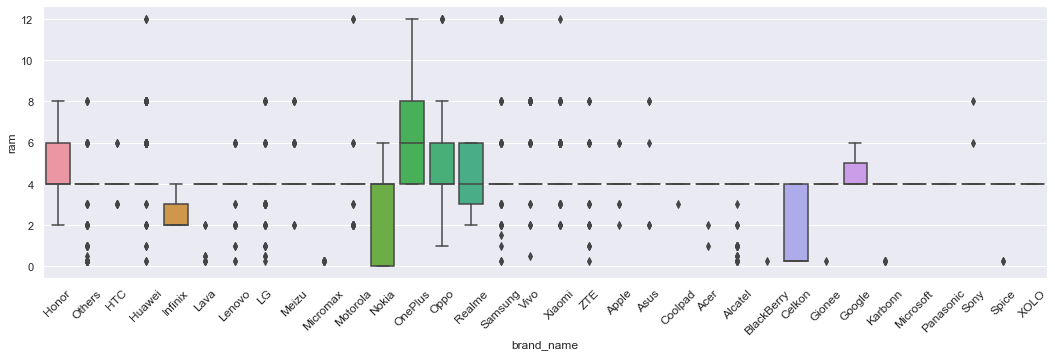

In [35]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="ram");

In [36]:
df.groupby("brand_name")["ram"].median()

brand_name
Acer          4.00
Alcatel       4.00
Apple         4.00
Asus          4.00
BlackBerry    4.00
Celkon        0.25
Coolpad       4.00
Gionee        4.00
Google        4.00
HTC           4.00
Honor         4.00
Huawei        4.00
Infinix       2.00
Karbonn       4.00
LG            4.00
Lava          4.00
Lenovo        4.00
Meizu         4.00
Micromax      4.00
Microsoft     4.00
Motorola      4.00
Nokia         4.00
OnePlus       6.00
Oppo          4.00
Others        4.00
Panasonic     4.00
Realme        4.00
Samsung       4.00
Sony          4.00
Spice         4.00
Vivo          4.00
XOLO          4.00
Xiaomi        4.00
ZTE           4.00
Name: ram, dtype: float64

In [37]:
df[(df["ram"]==4.00)]["brand_name"].value_counts()

Others        445
Samsung       301
Huawei        179
LG            162
Lenovo        151
ZTE           123
Asus          117
Micromax      107
HTC           104
Alcatel        98
Xiaomi         89
Motorola       88
Oppo           85
Sony           84
Vivo           83
Honor          70
Gionee         55
Nokia          51
Acer           49
XOLO           49
Meizu          48
Panasonic      47
Apple          34
Lava           28
Spice          28
Karbonn        24
Microsoft      22
BlackBerry     21
Coolpad        21
Realme         17
Celkon         12
Google         11
OnePlus        10
Infinix         2
Name: brand_name, dtype: int64

In [38]:
df[(df["ram"]==4.00)]["brand_name"].count()

2815

#### Question 3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
#### Answer
The amount of RAM does not vary much with brand as most devices (2815 out of 3454 sample size) comes configured with 4mb ram

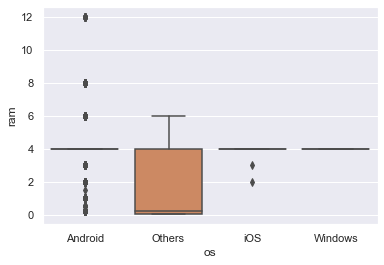

In [39]:
sns.boxplot(data=df, x="os", y="ram");

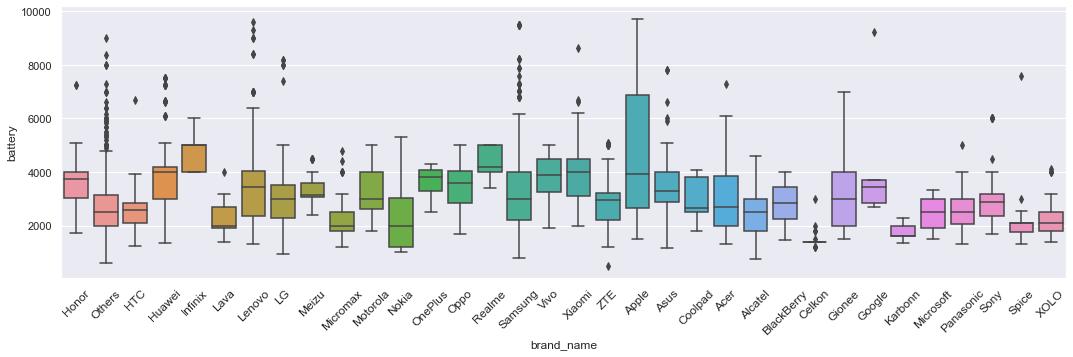

In [40]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="battery");

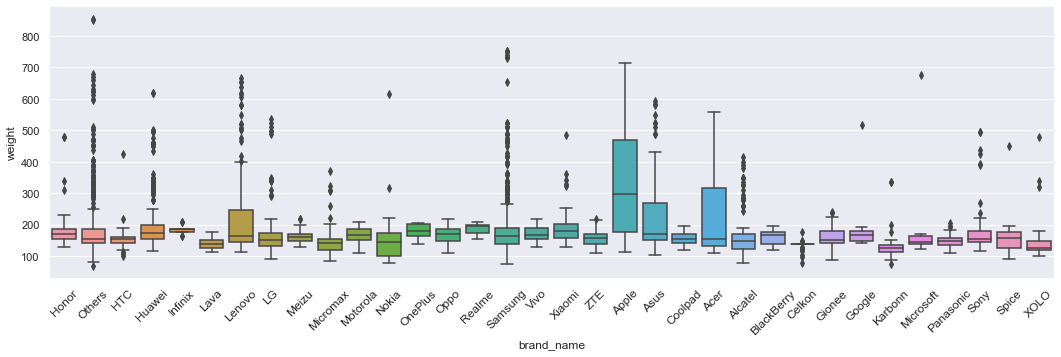

In [41]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="weight");

In [42]:
# New dataset of devices with batteries > 4500mAH
df_bat_over_4500mh = df[df["battery"] > 4500]
df_bat_over_4500mh.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


In [43]:
df_bat_over_4500mh.shape[0]

341

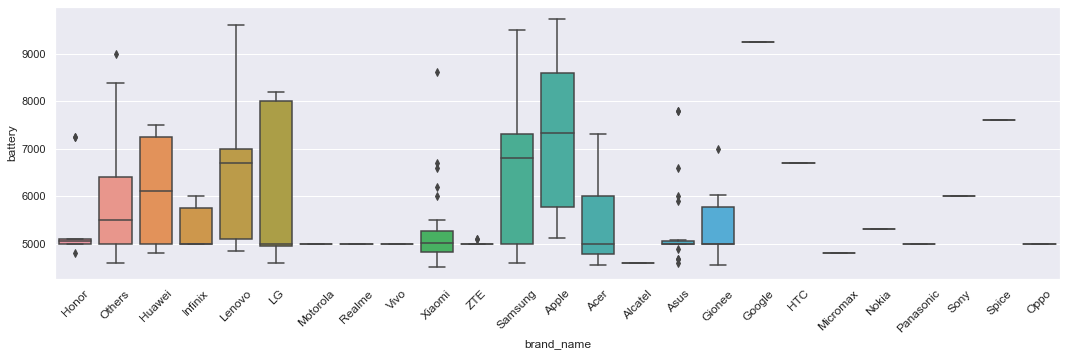

In [44]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df_bat_over_4500mh, x="brand_name", y="battery");

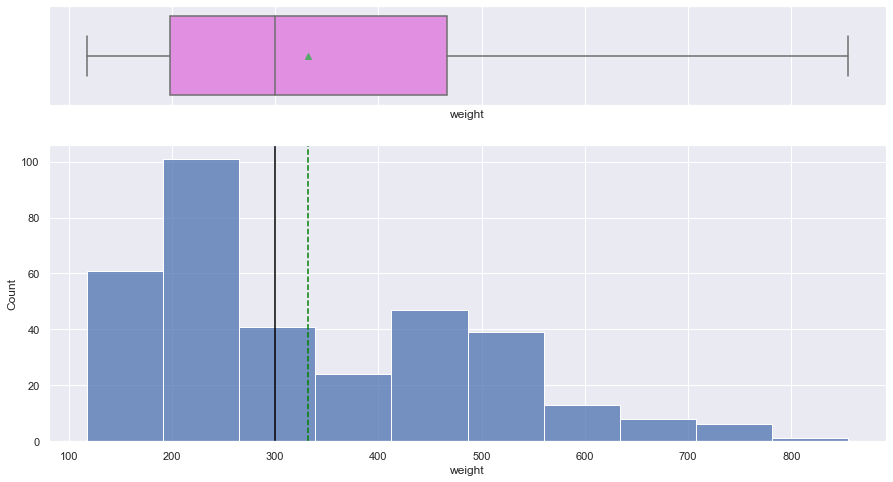

In [45]:
# Histogram and BoxPlot of the weight of devices with battery > 4500mAH 
histogram_boxplot(df_bat_over_4500mh, "weight")

#### Question 4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#### Answer
For devices with battery >4500mAH, the distribution of the weight is right skewed with the median at 300 grams and the mean lying around 330 grams.

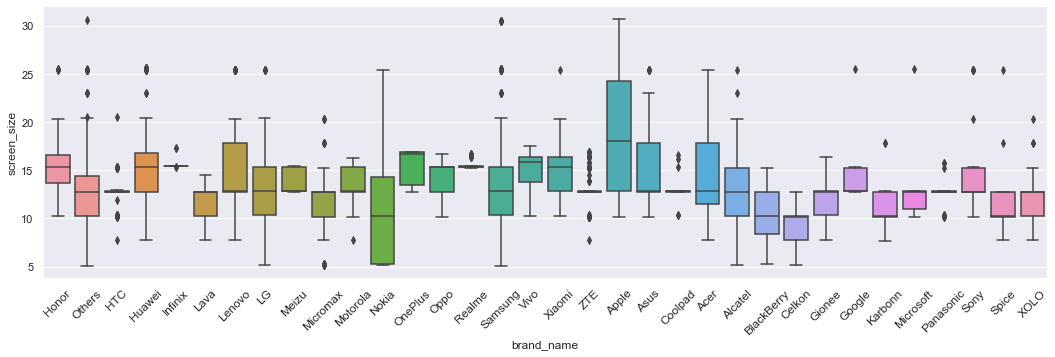

In [46]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="screen_size");

In [47]:
# deviceas with screen size greater than 6inches, that is 6 x 2.54 = 15.24cm
df[df["screen_size"]>15.24].brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

In [48]:
df[df["screen_size"]>15.24].brand_name.count()

1099

#### Question 5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
#### Answer
There are 1099 devices available across different brands with screen size greater than 15.24cm (6 inches) 

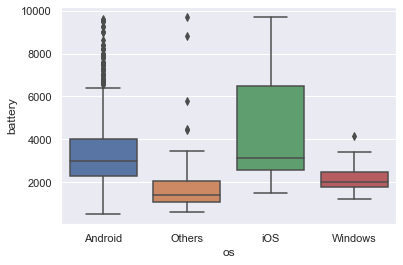

In [49]:
sns.boxplot(data=df, x="os", y="battery");

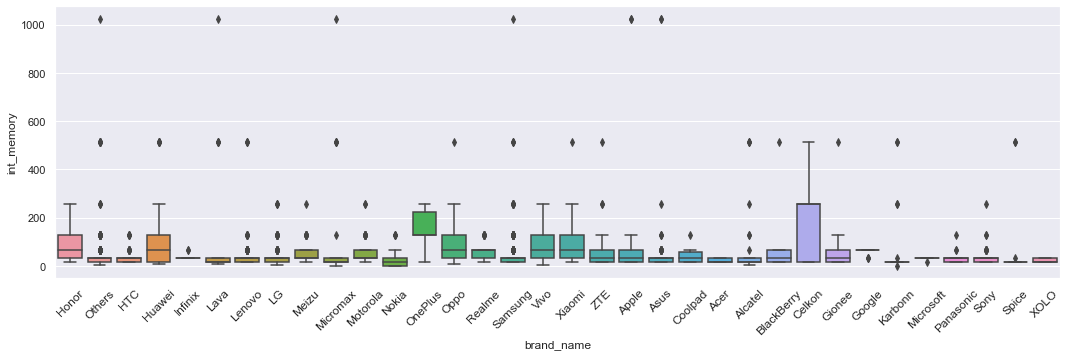

In [50]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="int_memory");

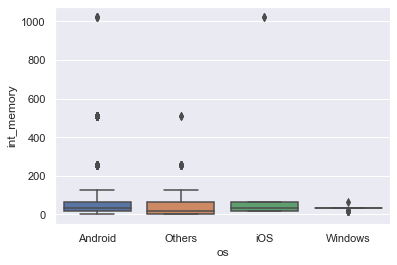

In [51]:
sns.boxplot(data=df, x="os", y="int_memory");

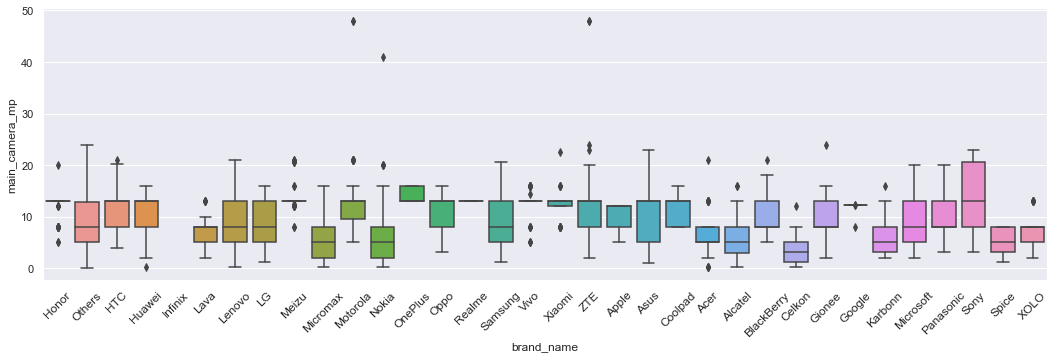

In [52]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="main_camera_mp");

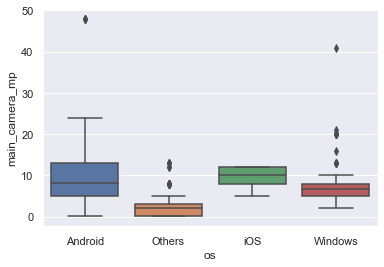

In [53]:
sns.boxplot(data=df, x="os", y="main_camera_mp");

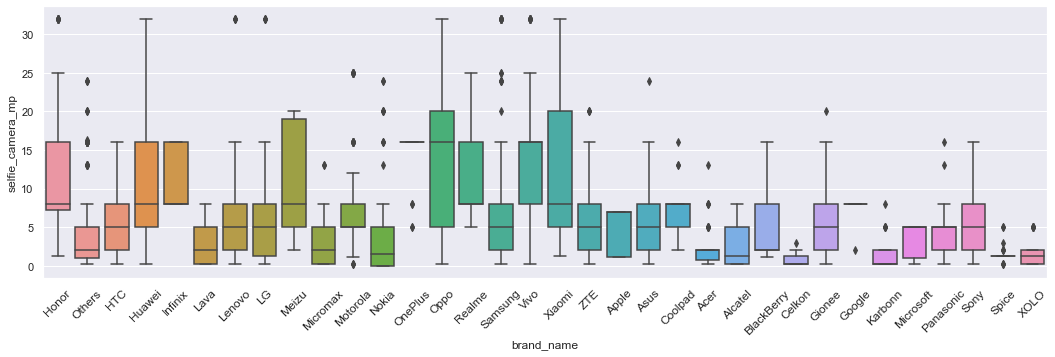

In [54]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="selfie_camera_mp");

In [55]:
# create a new dataset containg devices with selfie_camera_mp greater than 8 megapixels
df_selfie_camera_gt8 = df[df["selfie_camera_mp"] > 8]
df_selfie_camera_gt8.sample(n=5, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3326,ZTE,Android,16.43,yes,yes,NaN,20.0,128.0,6.0,4000.0,168.0,2020,217,5.371242,6.232743
2652,Others,Android,12.88,yes,no,12.0,13.0,32.0,4.0,4000.0,175.0,2018,607,4.631325,5.700845
3356,Huawei,Android,16.74,yes,no,13.0,16.0,64.0,4.0,4000.0,196.8,2019,263,4.765757,4.901267
3220,LG,Android,15.44,yes,yes,5.0,16.0,128.0,6.0,4300.0,180.0,2020,310,5.169518,6.483841
84,LG,Android,15.34,yes,yes,8.0,32.0,256.0,8.0,4000.0,192.0,2019,383,5.467680,7.003175


In [56]:
# no of entries in the dataset
df_selfie_camera_gt8.shape[0]

655

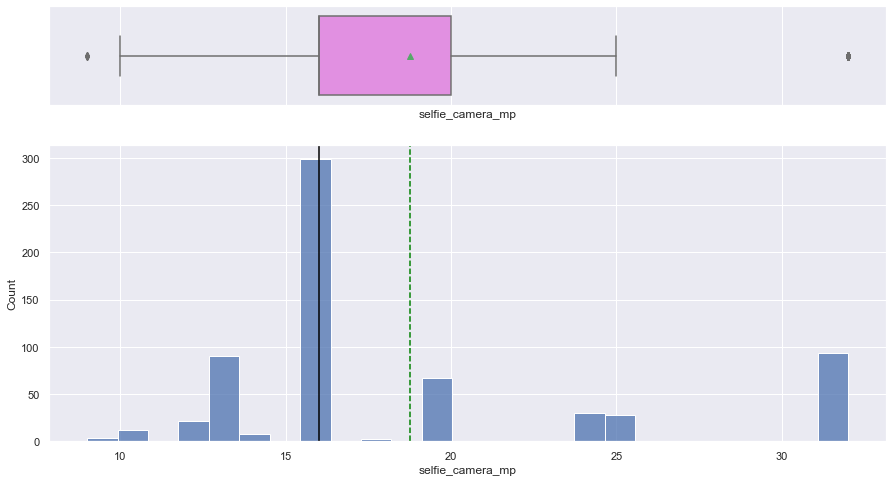

In [57]:
histogram_boxplot(df_selfie_camera_gt8, "selfie_camera_mp")

#### Question 6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
#### Answer:
The distribution of devices offering selfie cameras with greater than 8 megapixels is right skewed with the median 16 megapixels and the mean lying roughly at around 18 megapixels

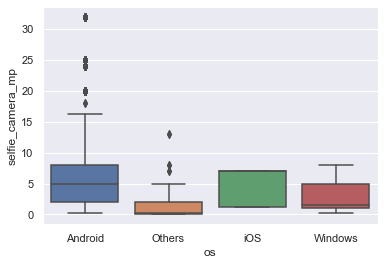

In [58]:
sns.boxplot(data=df, x="os", y="selfie_camera_mp");

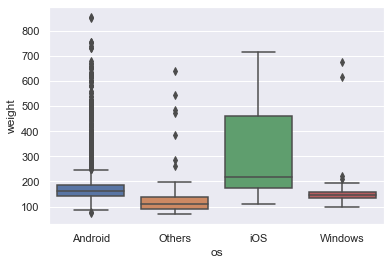

In [59]:
sns.boxplot(data=df, x="os", y="weight");

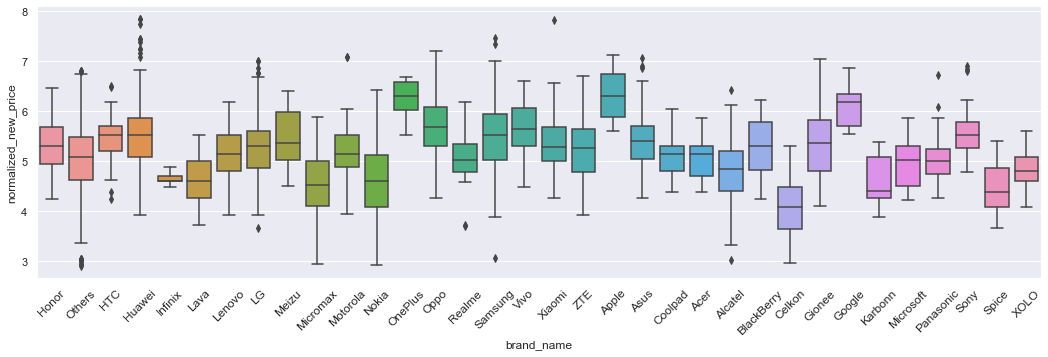

In [60]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="normalized_new_price");

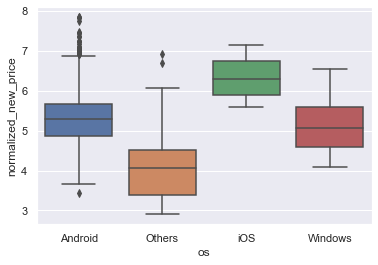

In [61]:
sns.boxplot(data=df, x="os", y="normalized_new_price");

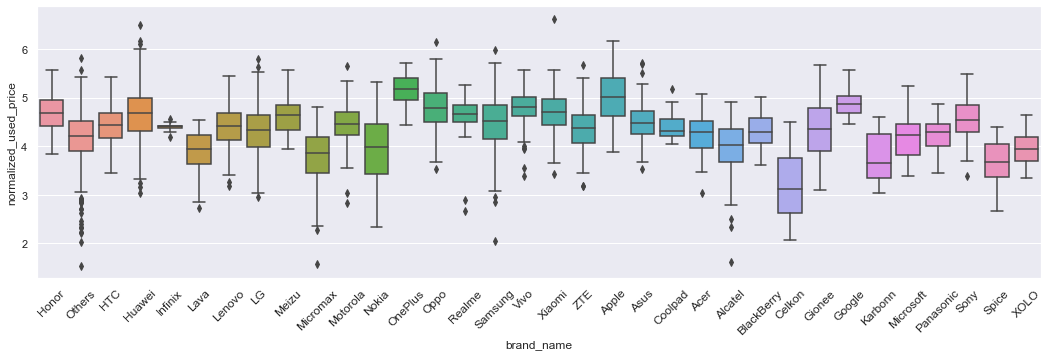

In [62]:
plt.figure(figsize=(18, 5))
plt.xticks(rotation=45, fontsize=12)
sns.boxplot(data=df, x="brand_name", y="normalized_used_price");

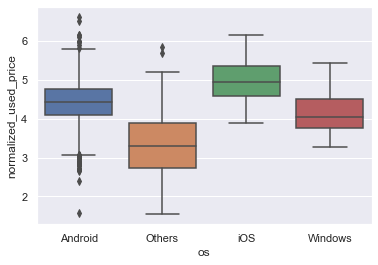

In [63]:
sns.boxplot(data=df, x="os", y="normalized_used_price");

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [64]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [65]:
# Columns with missing values

columns_w_miss_val = ["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight",]

In [66]:
# impute missing values in columns with their median values by grouping by release year

for column in columns_w_miss_val:
    df[column] = df[column].fillna(value=df.groupby(["release_year"])[column].transform("median"))

In [67]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [68]:
# random sample of data from the dataset after missing value treatment
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,8.00,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,12.20,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


### Feature engineering
release_year has no use as an integer. What it might have been useful for is to give us an idea of how long the phone has been in use, but this feature has been taken care of by the attribute "days_used". We will therefore turn release_year into an object type.

In [69]:
df.release_year = df.release_year.astype("object")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   object 
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Outlier detection and treatment 

In [71]:
num_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_columns

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

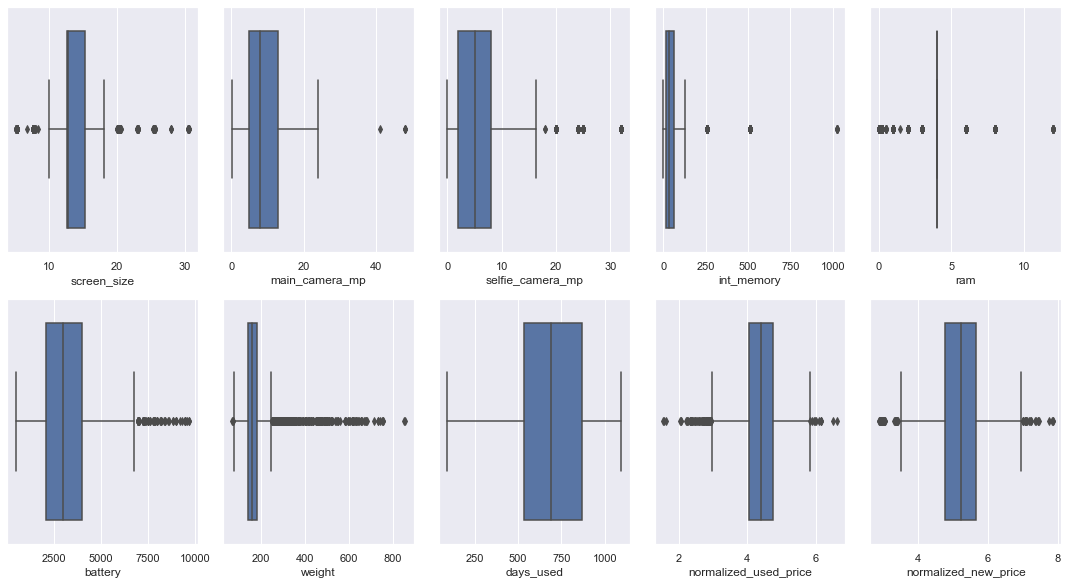

In [72]:
plt.figure(figsize=(15, 20))

for j, column in enumerate(num_columns):
    plt.subplot(5, 5, j + 1)
    sns.boxplot(data=df, x=column)
    plt.tight_layout()
plt.show()

### Observations

There are outliers in all the columns plotted except the days_used column. Since these outliers are actually real values and dropping them is bound to lead to loss of important information, I choose to leave them as they are.

### Preparing data for modelling

    We want to predict the normalized price of used devices
    Before we proceed to build a model, we'll have to encode categorical features
    We'll split the data into train and test to be able to evaluate the model that we build on the train data
    We will build a Linear Regression model using the train data and then check it's performance



In [73]:
# defining X and y variables
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

In [74]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [75]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [76]:
# let's add the intercept to data
X = sm.add_constant(X)

In [77]:
X.head()

,const,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price
0,1.0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100
1,1.0,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018
2,1.0,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3,1.0,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961
4,1.0,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837


In [78]:
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
cat_columns

['brand_name', 'os', '4g', '5g', 'release_year']

In [79]:
# Create dummy variables for the categorical variables
X = pd.get_dummies(X, cat_columns, drop_first=True)

In [80]:
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,os_iOS,4g_yes,5g_yes,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,1,0,0,0,0,0,0,0,1
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,1,1,0,0,0,0,0,0,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,1,1,0,0,0,0,0,0,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,1,1,0,0,0,0,0,0,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,1,0,0,0,0,0,0,0,1


In [81]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [82]:
X_train.shape[0]

2417

In [83]:
X_test.shape[0]

1037

In [84]:
y_train.shape[0]

2417

In [85]:
y_test.shape[0]

1037

## EDA

- It is a good idea to explore the data once again after manipulating it.

The nature of our dataset has not changed except for the "release_year" which has been re-casted as an object type, therefore there is no need for further EDA

## Model Building - Linear Regression

In [86]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     240.7
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:02:41   Log-Likelihood:                 134.49
No. Observations:                   2417   AIC:                            -159.0
Df Residuals:                       2362   BIC:                             159.5
Df Model:                             54                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted R-squared**: This value reflects the fit of the model.
The value for adj. R-squared in our model is 0.843, which looks good.

2. ***const* coefficient**: This is the Y-intercept.
It means that if all the predictor variable coefficients are zero, then the expected output Y, would be equal to the *const* coefficient. The 'cont' coefficient for our linear regression model is 1.1230

3. **Coefficient of a predictor variable**: This represents the change in the output Y due to a change in the predictor variable (everything else held constant). 
In our regression model, the coefficient for 'release_year_2020' and 'brand_name_Nokia' are 0.2026 and 0.0744 respectively.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We shall be using the functions defined in sklearn to compute the RMSE, MAE, and R-squared.
* We will define a function to calculate MAPE and the Adjusted R-squared.
* The mean absolute percentage error (MAPE) measures the accuracy of our predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [88]:
# checking model performance on the train set (70% of the data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228875,0.179677,0.846245,0.842663,4.310699


In [89]:
# checking model performance on test set (30% of the data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239608,0.186217,0.840822,0.831898,4.541378


### Observations

1. The training R-squared is 0.8462. This means that the model explains 84.62% of the variation in the train data. The model is not underfitted.

2. The train MAE is 0.1797, while the test MAE is 0.1862. The train and test RMSE are 0.2289 and 0.2396 respectively. The MAE and RMSE for the train and test sets are comparable, therefore the model is not overfitted.

3. An MAE of 0.1862 shows that our model can predict the price of used devices within a mean error of 0.1862 on the test data. 

4. An MAPE of 4.54 on the test set suggests that our model enables us to predict the price of used devices to within 4.54%.

### Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will therefore be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity by using VIF and observing the following:
* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [90]:
# function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [91]:
# checking VIF on train data
checking_vif(X_train)

,feature,VIF
0,const,257.809442
1,screen_size,7.905953
2,main_camera_mp,2.354646
3,selfie_camera_mp,2.891210
4,int_memory,1.379578
5,ram,2.263086
6,battery,4.079022
7,weight,6.482227
8,days_used,3.248277
9,normalized_new_price,3.236262


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity


##### To remove multicollinearity, we will do the following: 

* Systematically drop numerical columns with VIF > 5 one after the other
* Look at the adjusted R-squared and RMSE of all the model
* Drop the variable that makes the least change in adjusted R-squared.
* Repeat until all VIF scores are less than 5

##### Ignore the VIF values for dummy variables and the constant (intercept)

In [92]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [93]:
col_list = ["screen_size","weight"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.839402,0.233960
1,screen_size,0.839092,0.234186


In [94]:
col_to_drop = "weight"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

In [95]:
# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,250.278381
1,screen_size,3.632051
2,main_camera_mp,2.266638
3,selfie_camera_mp,2.868247
4,int_memory,1.379548
5,ram,2.261424
6,battery,3.706315
7,days_used,3.240449
8,normalized_new_price,3.233490
9,brand_name_Alcatel,3.413319


#### Observation
* All VIF values are now less than 5 except the VIF values of some of the dummy variables 

In [96]:
# We rebuild our model using the updated set of predictors variables

olsmod1 = sm.OLS(y_train, X_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     239.3
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:02:42   Log-Likelihood:                 108.67
No. Observations:                   2417   AIC:                            -109.3
Df Residuals:                       2363   BIC:                             203.3
Df Model:                             53                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations

* We can see that adj. R-squared has dropped from 0.843 to 0.839. Since this change is not too large, it shows that the dropped column ("weight) did not have much effect on the model
* Since there is no multicollinearity between the numerical variables, we will now look at the p-values of predictor variables to check their significance



#### Dealing with high p-value variables

Some of the numerical variables have p-values > 0.05 (int_memory, battery and days_used)
Most of the dummy variables also have p-value > 0.05

Precictors with p-value > 0.05 are not significant and we will drop them one after the other by doing the following:

1. We will build a model, check the p-values of the variables, and drop the column with the highest p-value
2. Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
3. Repeat the above two steps till there are no columns with p-value > 0.05

In [97]:
# initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'release_year_2015', 'release_year_2016', 'release_year_2017', 'release_year_2018', 'release_year_2019', 'release_year_2020']


In [98]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [99]:
olsmod2 = sm.OLS(y_train, X_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     906.2
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:02:42   Log-Likelihood:                 92.520
No. Observations:                   2417   AIC:                            -155.0
Df Residuals:                       2402   BIC:                            -68.19
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [100]:
# checking model performance on the train set (70% of the data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, X_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232883,0.182585,0.840812,0.839817,4.37586


In [101]:
# checking model performance on the test set (30% of the data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, X_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239254,0.185721,0.841292,0.838961,4.52062


**Observations**

1. No feature has p-value greater than 0.05 
2. The features in X_train3 can now be considered as the final set of predictor variables
3. olsmod2 is the final model we will be working with from here on
4. Adjusted R-squared is 0.840, that is, our model is able to explain approx 84% of the variance
5. The variables we dropped did not adversely affect our model's performance since the adjusted R-squared in olsmod1 (our model after removing multicollinearity between the numerical variables) was 0.839
6. RMSE and MAE values are comparable for train and test sets, therefore the model is not overfitting

** We will now check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### TEST FOR LINEARITY AND INDEPENDENCE

##### How to check linearity and independence?
1. We make a plot of fitted values vs residuals.
2. If they don't follow any pattern, then we say the model is linear and residuals are independent.
3. Otherwise, the model is showing signs of non-linearity and residuals are not independent.


In [102]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.843626,0.243862
1525,4.448399,4.649560,-0.201161
1128,4.315353,4.333024,-0.017672
3003,4.282068,4.265967,0.016101
2907,4.456438,4.462998,-0.006560


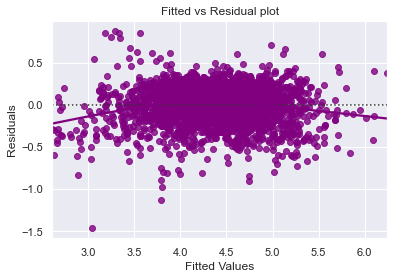

In [103]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* Since there is no pattern in the scatter plot above, the assumptions of linearity and independence are therefore satisfied.

#### TEST FOR NORMALITY

##### How to check normality?
1. Do an histogram plot of the residuals. The shape can give us an initial idea about the normality.
2. Normality can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, the plot will follow a straight line plot. if it does not, then the normality condition is not satisfied.
3. We can also check for normality by using the Shapiro-Wilk test.
* Null hypothesis: Residuals are normally distributed
* Alternate hypothesis: Residuals are not normally distributed


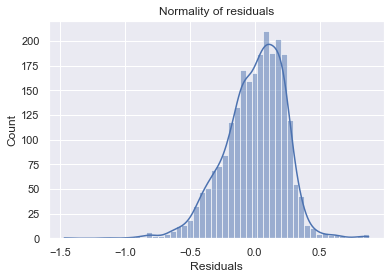

In [104]:
# histogram plot of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

##### The histogram of residuals is almost a bell shape

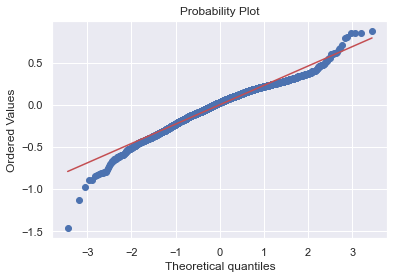

In [105]:
# Q-Q plot

import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### The residuals do follow a straight line except for the tails.

In [106]:
# The Shapiro-Wilk test.

stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9738162159919739, pvalue=1.2307983033488058e-20)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

#### TEST FOR HOMOSCEDASTICITY
##### How to check for homoscedasticity?

1. We can look at the residual vs fitted values plot to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
2. The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
* Null hypothesis: Residuals are homoscedastic
* Alternate hypothesis: Residuals have heteroscedasticity


In [107]:
# The goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.061325723449768), ('p-value', 0.1520169430494583)]

#### Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model

### Predictions on test data

In [108]:
# predictions on the test set
pred = olsmod2.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.390895
2341,3.696103,3.929116
1913,3.592093,3.764643
688,4.306495,4.065826
650,4.522115,5.146204
2291,4.259294,4.406560
40,4.997685,5.395996
1884,3.875359,4.142085
2538,4.206631,4.040028
45,5.380450,5.284791


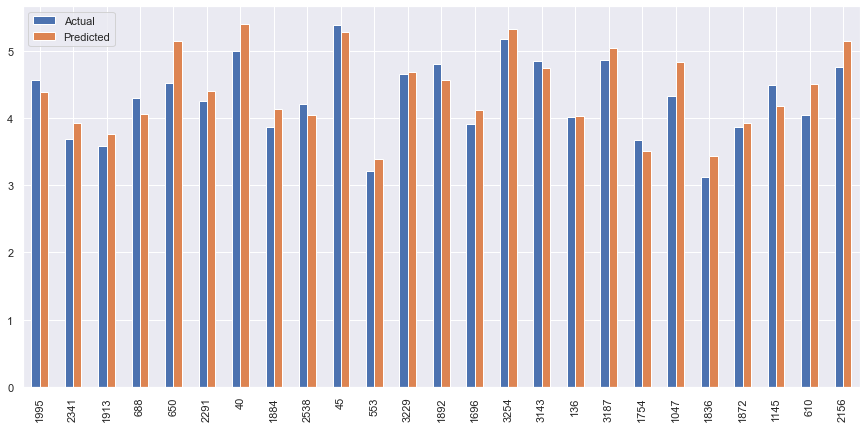

In [109]:
# Plot of the predicted and actual values
predictions = df_pred_test.sample(25, random_state=1)
predictions.plot(kind="bar", figsize=(15, 7))
plt.show()

In [110]:
olsmodel_final = sm.OLS(y_train, X_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     906.2
Date:                   Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                           15:02:45   Log-Likelihood:                 92.520
No. Observations:                   2417   AIC:                            -155.0
Df Residuals:                       2402   BIC:                            -68.19
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [111]:
# checking model performance on the train set (70% of the data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, X_train3, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232883,0.182585,0.840812,0.839817,4.37586


In [112]:
# checking model performance on the test set (30% of the data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test3, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239254,0.185721,0.841292,0.838961,4.52062


In [113]:
# Automating or writing the equation for the linear regression model

print("Normalized_Used_Price = ",end=" ")
for i in range(len(X_train3.columns)):
    if i == 0:
        print("%.4f" % olsmodel_final.params[i], "+", end=" ")
    elif i != len(X_train3.columns) - 1:
        print("((","%.4f" % olsmodel_final.params[i],") *",X_train3.columns[i],") +",end=" ")
    else:
        print("((","%.4f" % olsmodel_final.params[i],") *", X_train3.columns[i],")")

Normalized_Used_Price =  1.0845 + (( 0.0433 ) * screen_size ) + (( 0.0190 ) * main_camera_mp ) + (( 0.0136 ) * selfie_camera_mp ) + (( 0.0170 ) * ram ) + (( 0.4356 ) * normalized_new_price ) + (( 0.0462 ) * brand_name_Lenovo ) + (( 0.0741 ) * brand_name_Nokia ) + (( 0.0947 ) * brand_name_Xiaomi ) + (( 0.0773 ) * release_year_2015 ) + (( 0.1040 ) * release_year_2016 ) + (( 0.1032 ) * release_year_2017 ) + (( 0.0746 ) * release_year_2018 ) + (( 0.0843 ) * release_year_2019 ) + (( 0.1612 ) * release_year_2020 )


## Actionable Insights and Recommendations 

**INSIGHTS**
1. The price of used devices is highly dependent on its price when new,  and on its year of release.
2. Used device prices are also dependent on their screen size, cameras (both main and selfie), the amount of ram and also the battery capacity.
3. Devices with large screen sizes tend to have larger batteries and consequently weighs more. This can be deduced from the very strong correlaton that exists between screen sizes, battery capacity and device weight.
4. Recently released phones comes with selfie cameras with higher megapixels.


**RECOMMENDATIONS**
1. Our model can be used to predict the prices of used devices with a high degree of accuracy
2. We should focus more on recently released devices because they will fetch more on the used device market.
3. Greater emphasis should be placed on devices with large screen sizes and battery capacity as these attributes also enhances the resale value of these devices.
4. There is the need to market used devices to the the right consumer group, therefore it may be necessary in future, to include demographic information in the data so as to help in determining who and who is buying what on the used device market.



___